In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from skimage import io
from skimage.transform import rotate

from torchvision import transforms

In [2]:
from helper import generalPipeline, get_hog
from model import DocumentAlignmentNet
from constants import label_mapping, pred_map

In [3]:
prediction_transform = transforms.Compose([
                # transforms.Resize((256, 256)),
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

In [ ]:
os.listdir("data/original_images/prediction")

In [4]:
path = "data/original_images/prediction/qlxn0226_1.png"

# _ = generalPipeline(path)

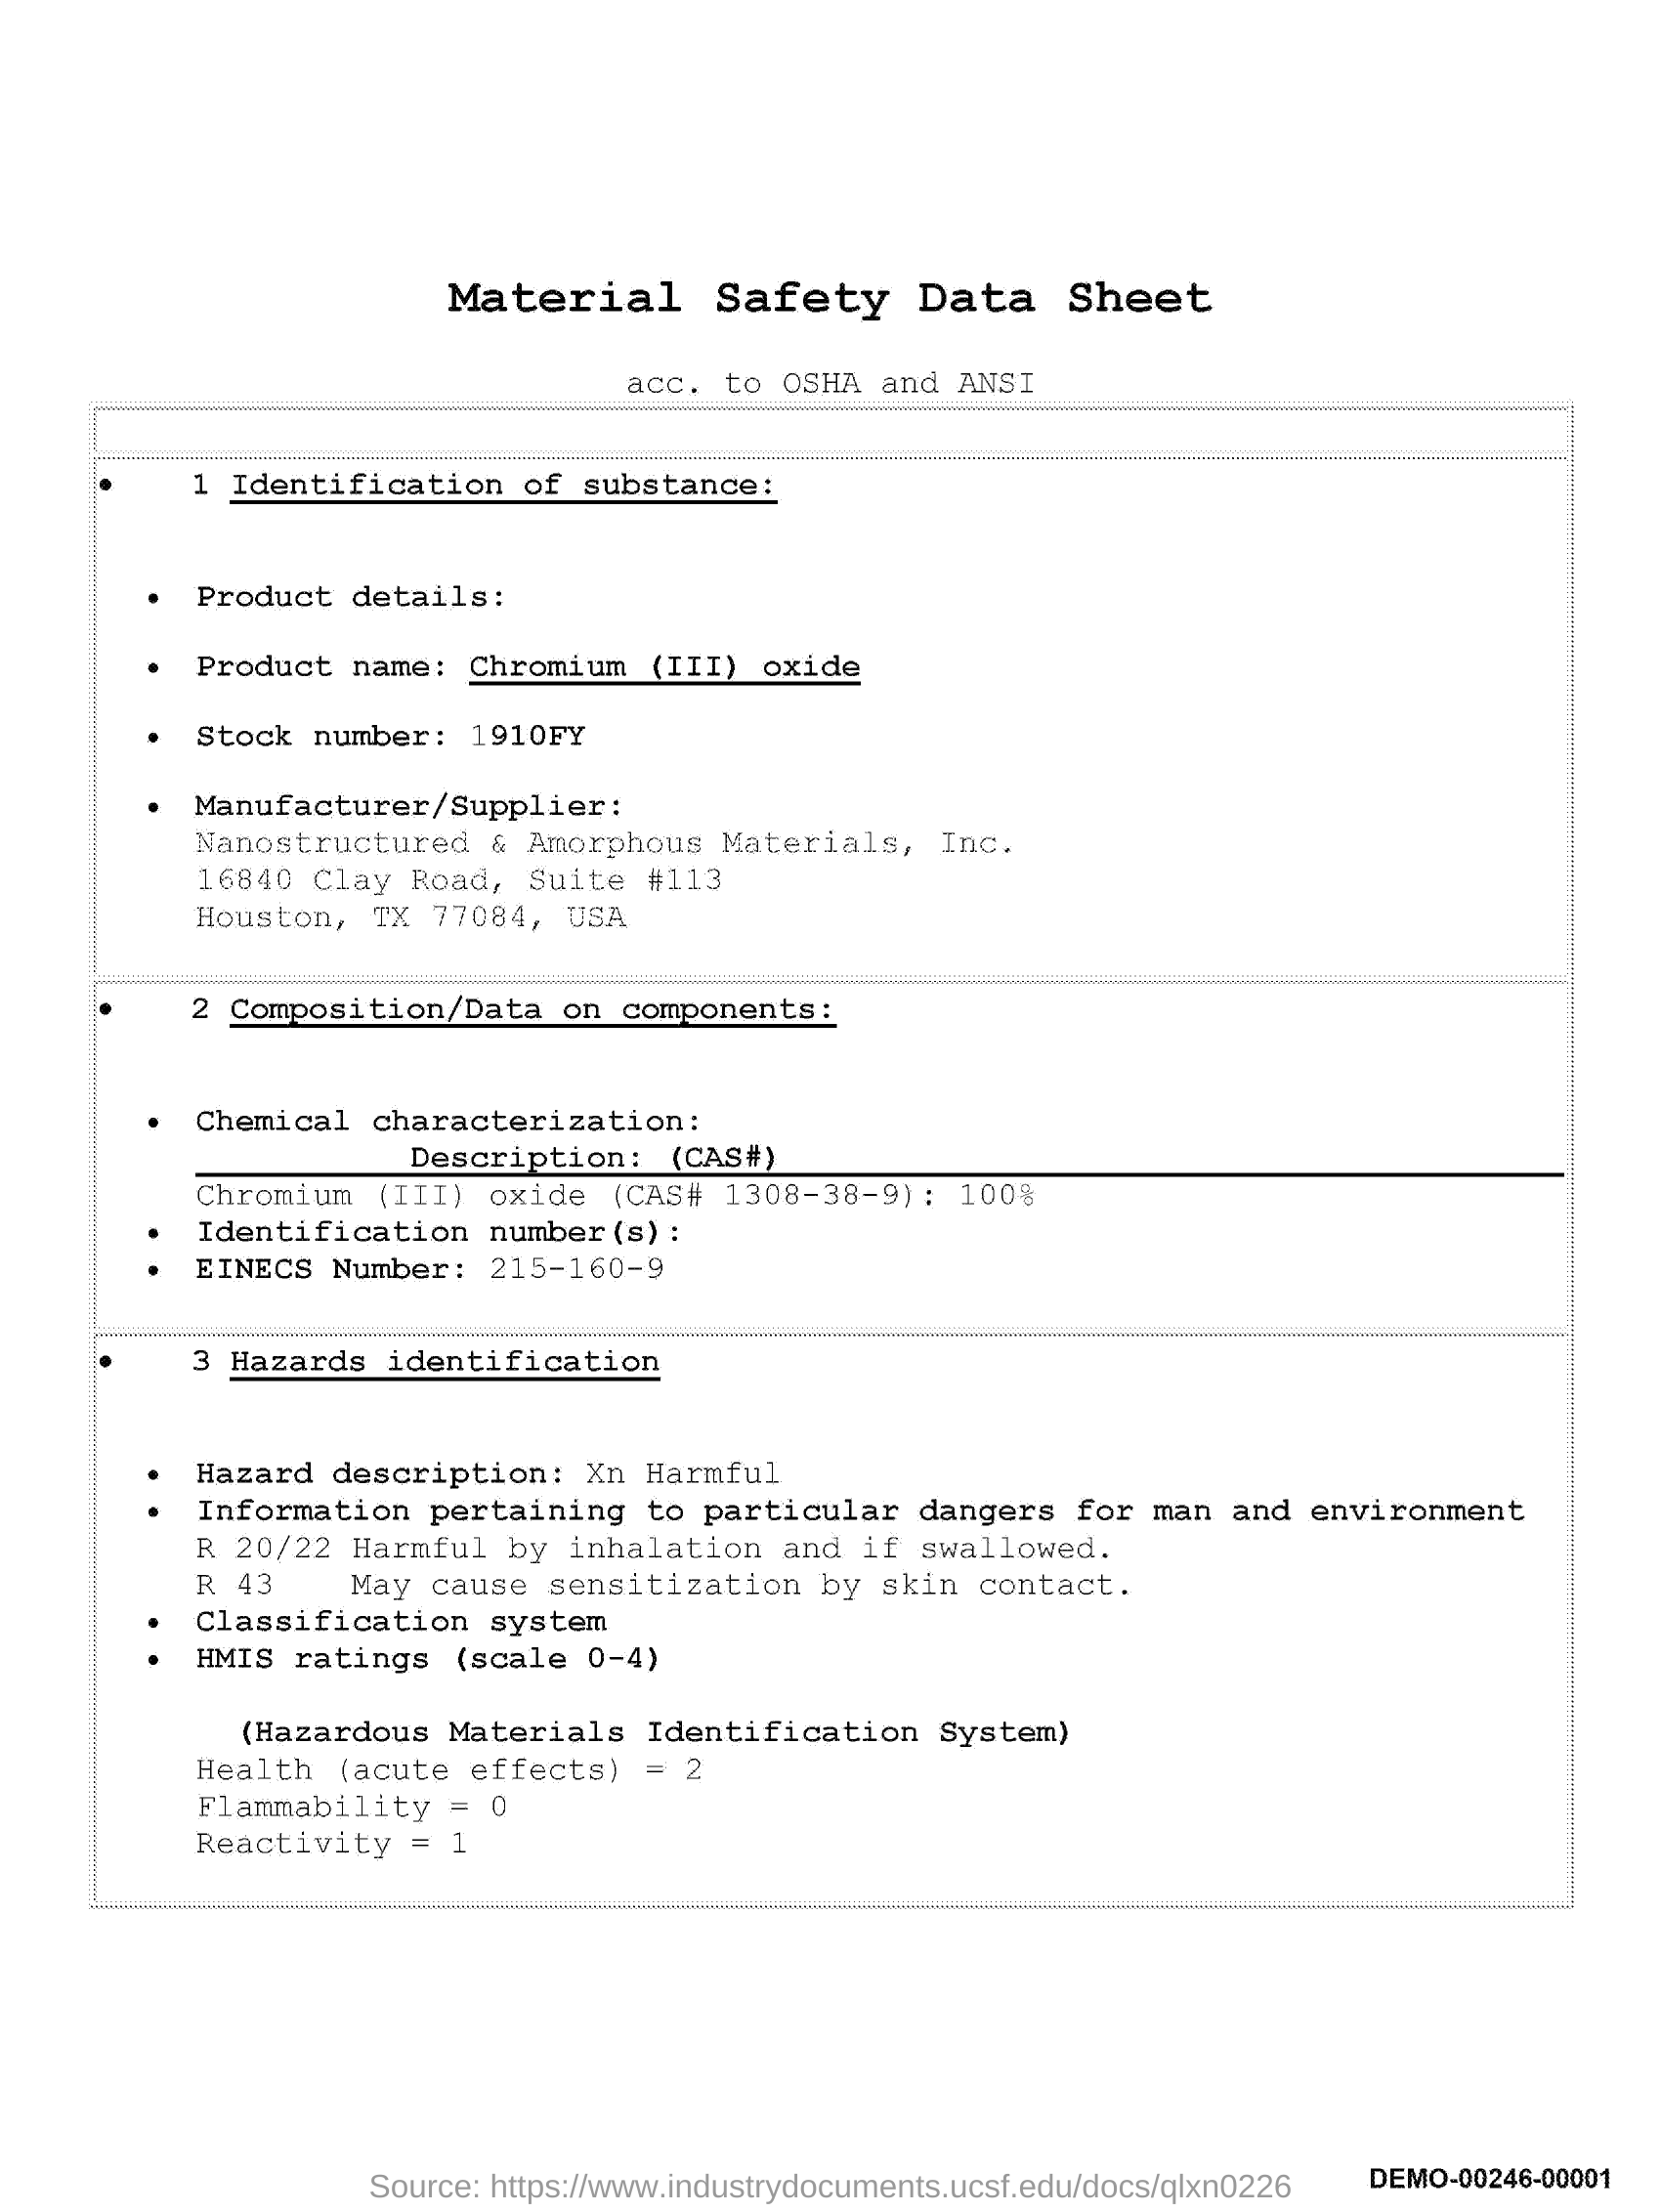

In [5]:
orig = Image.open(path)
orig

In [6]:
rotated=orig.rotate(90, expand=True)
rotated.save("rotated_image.png")

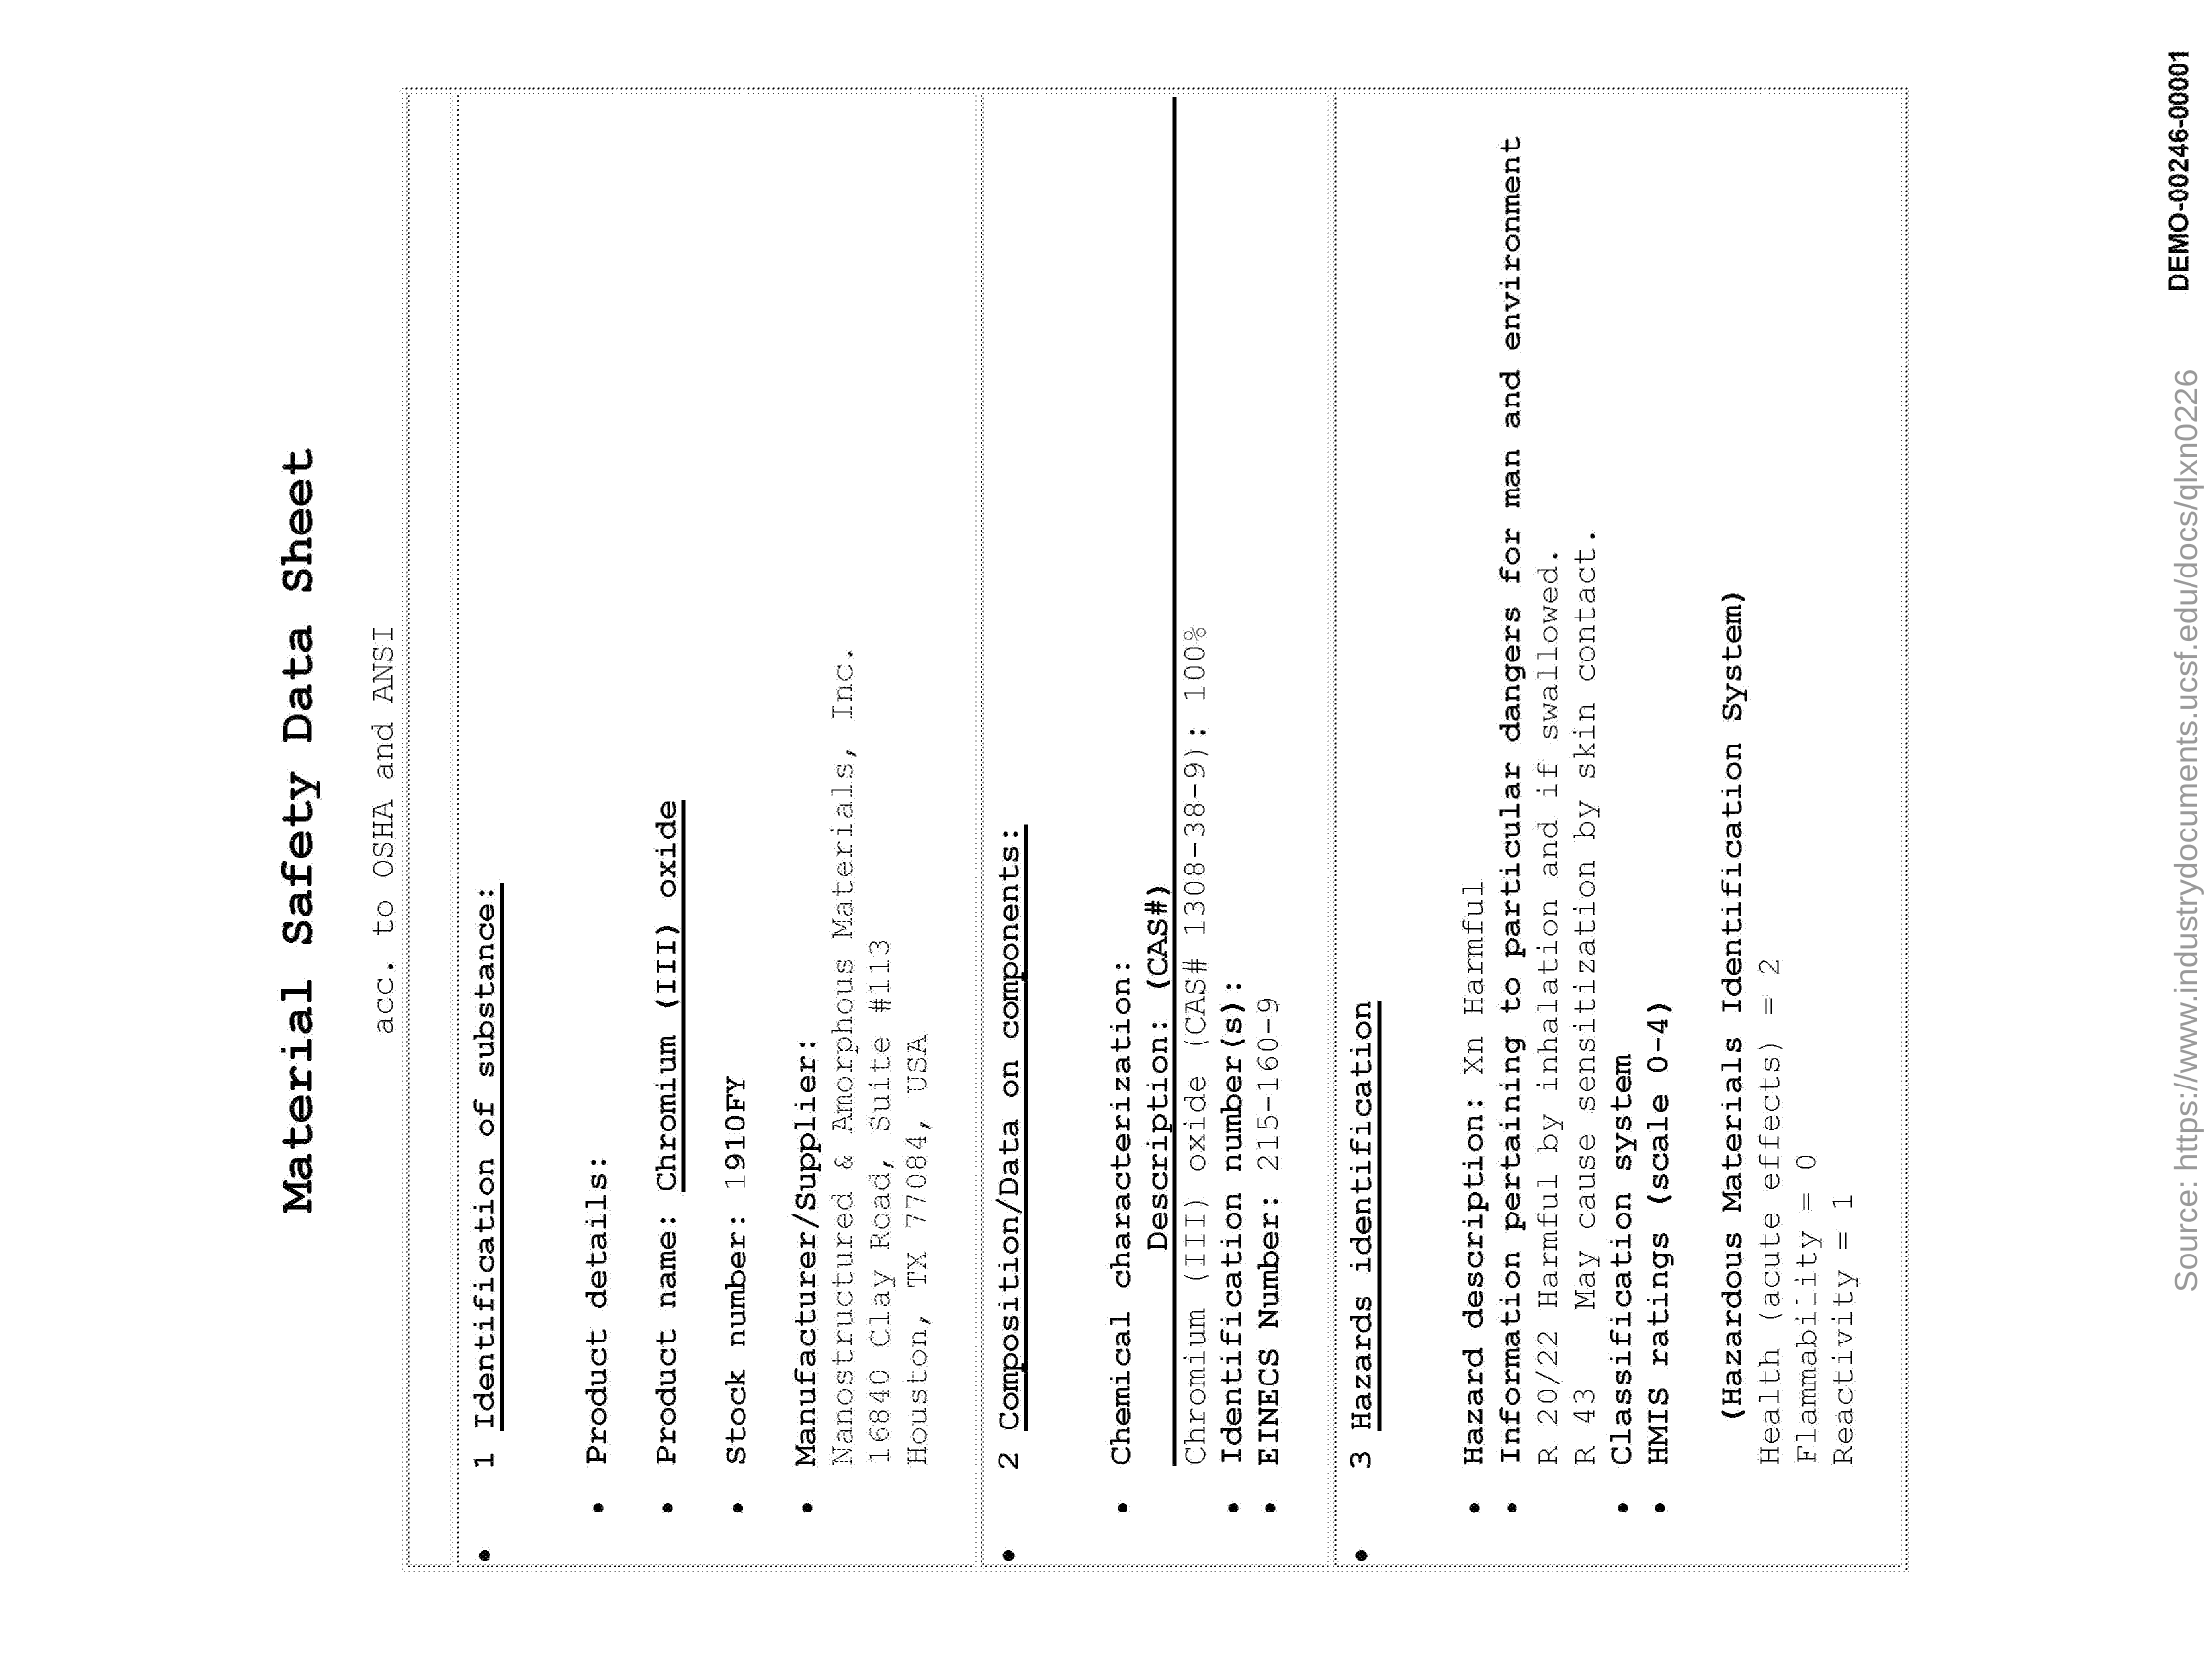

In [7]:
rotated

In [8]:
pp = generalPipeline("rotated_image.png")

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [ ]:
image1 = Image.open("output_image.png")
np.array(image1)

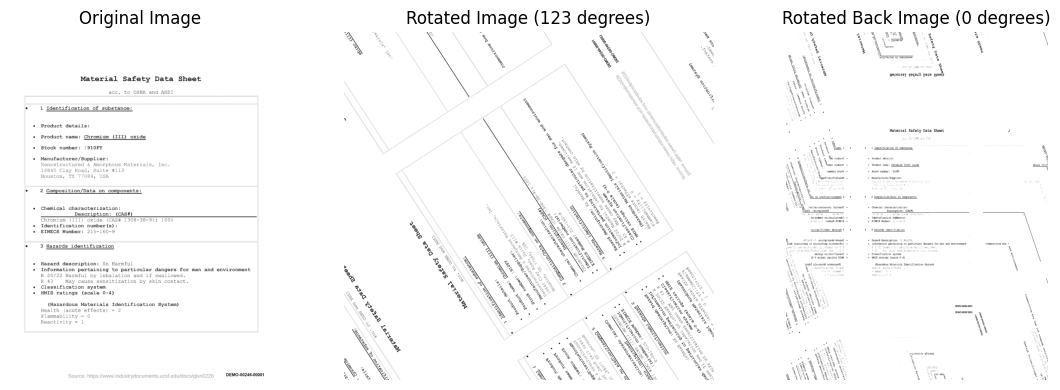

Pixel values are not preserved after rotation.


In [11]:
import numpy as np
from skimage import io, transform

def rotate_image(image, degrees):
    # Rotate the image
    rotated_image = transform.rotate(image, degrees, resize=True, mode='reflect')

    # Rotate back to 0 degrees
    rotated_back_image = transform.rotate(rotated_image, -degrees, resize=True, mode='reflect')

    # Resize the rotated-back image to match the original image dimensions
    resized_rotated_back_image = transform.resize(rotated_back_image, image.shape, mode='reflect')

    # Round the pixel values to integers
    resized_rotated_back_image = np.round(resized_rotated_back_image).astype(np.uint8)

    return rotated_image, resized_rotated_back_image

# Load the original image
original_image = io.imread(path)

# Rotate the image to 123 degrees and back to 0 degrees
rotated_image, rotated_back_image = rotate_image(original_image, 123)

# Verify if pixel values are preserved
pixel_diff = np.abs(original_image.astype(np.int16) - rotated_back_image.astype(np.int16))
max_diff = np.max(pixel_diff)
pixel_values_preserved = max_diff == 0

# Plot the original, rotated, and rotated-back images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(original_image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(rotated_image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Rotated Image (123 degrees)')

axes[2].imshow(rotated_back_image, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Rotated Back Image (0 degrees)')

plt.tight_layout()
plt.show()

# Print the verification result
if pixel_values_preserved:
    print("Pixel values are preserved after rotation.")
else:
    print("Pixel values are not preserved after rotation.")


In [ ]:
np.array(orig)

In [ ]:
from PIL import Image

def rotate_image(image_path, theta):
    """
    This function is used to rotate the image by the 360 -theta
    
    Input Image 
    """
    
    
    # Load the image
    image = Image.open(image_path)

    # Convert the image to RGBA
    image = image.convert("RGBA")

    # Rotate the image
    angle = 360 - theta
    rotated_image = image.rotate(angle, resample=Image.BICUBIC, expand=True)

    # Create a new image with transparent background
    transparent_image = Image.new("RGBA", rotated_image.size, (0, 0, 0, 0))

    # Paste the rotated image onto the transparent background
    transparent_image.paste(rotated_image, (0, 0), rotated_image)

    # Convert the image back to RGB (if needed)
    final_image = transparent_image.convert("RGB")

    # Save the rotated image
    output_path = "rotated_image_2.jpg" 
    final_image.save(output_path)
    
    return final_image

In [ ]:
360-220

In [ ]:
rotate_image("rotated_image.jpg", 140)

In [ ]:
np.unique(w2)

In [ ]:
np.array_equal(w1,w2)

In [ ]:
path = "data/rotated_images/prediction"

for images in os.listdir(path):
    
    _ = generalPipeline(os.path.join(path, images), images)

In [ ]:
os.listdir("data/original_images/prediction")

In [ ]:
os.listdir("logs")

In [ ]:
image = Image.open("logs/qkgw0023_2_161.png")
image

In [ ]:
image_or = Image.open("data/original_images/prediction/qkgw0023_2.png")
rotated_image_or = image_or.rotate(180, expand=True)
rotated_image_or

In [ ]:
np.array(image)

In [ ]:
np.array(rotated_image_or)

In [ ]:
np.array(image_or)

In [ ]:
import torch
model = DocumentAlignmentNet()
model.load_state_dict(torch.load('cnn_model.pth'))
model

In [ ]:
# Open the document image
def get_prediction(pixels):
    hog_features = get_hog(pixels=pixels)
    pixels = prediction_transform(hog_features)
    # print()
    prediction = model.predict(pixels.unsqueeze(0))
    
    return pred_map.get(prediction.item())

In [ ]:
def save_rotated_image(path):
    hough_pixels = generalPipeline(path)
    prediction = get_prediction(hough_pixels)
    
    rotated_angle = 360-prediction
    
    fixed_image = rotate(hough_pixels, rotated_angle)
    fixed_image_uint8 = (fixed_image * 255).astype(np.uint8)
    
    image_to_save = Image.fromarray(fixed_image_uint8)
    
    #image name
    name = path.split("/")[-1]
    
    #prefix
    prefix = "/".join(path.split("/")[:-1])

    # Save the image as JPEG
    image_to_save.save(os.path.join(prefix,"rotated_"+name), 'PNG')
    
    print(f"{name} aligned from {prediction} degree to {rotated_angle} image saved to {prefix}")

In [ ]:
folder_path = "data/rotated_images/prediction"


for image in os.listdir(folder_path):
    if image.split(".")[-1] != "ipynb_checkpoints":
        path = os.path.join(folder_path, image)
        save_rotated_image(path)